In [254]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [255]:
df = pd.read_csv("./Data/DataFrameParaHacerModelos.csv")
df

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair,Adultos
1,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor,Adultos
2,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good,Adultos
3,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent,Adultos
4,Spain,Male,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Fair,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,France,Male,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Very Good,Adultos
9496,France,Male,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Poor,Jovenes-Adultos
9497,France,Female,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Good,Adultos
9498,Germany,Male,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Very Good,Adultos


## Vamos a eliminar la variable complain

In [256]:
df.drop(columns="Complain",inplace=True)

### Ahora vamos a empezar a separar los datos en train y test para modelizar con los datos que tenemos 

In [258]:
variablesx = list(df.columns)
variablesx.remove("Exited")
variablesx


['Geography',
 'Gender',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [259]:
x = df[variablesx]
y = df["Exited"]
y


0       0
1       1
2       0
3       0
4       1
       ..
9495    0
9496    0
9497    1
9498    1
9499    0
Name: Exited, Length: 9500, dtype: int64

# Categoricas

['Geography',
 'Gender',
 'Card Type',
 'CreditScoreCategorizada',
 'AgeCategorizada',
 'HasCrCard',
 'IsActiveMember',
 'Satisfaction Score']

# Numericas

    - Balance
    - EstimatedSalary  
    - Point Earned
    - Tenure
    - NumOfProducts 

In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=922)

#### **Codificamos las variables Categoricas**

In [262]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
columns_to_encode = ['Geography','Gender','Card Type','CreditScoreCategorizada','AgeCategorizada','HasCrCard','IsActiveMember','Satisfaction Score']
encoded_columns_train = ohe.fit_transform(x_train[columns_to_encode].values)
encoded_columns_test = ohe.transform(x_test[columns_to_encode].values)

### Exportamos la codificacion de las variables categóricas (ohe)

In [263]:
import pickle 

with open ('./Transformaciones/TransformacionOHE.pkl',"wb") as f:
    pickle.dump(ohe,f)

#### Codificamos las variables Numericas

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_escaler = ["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]
escaler_columns_train = scaler.fit_transform(x_train[columns_to_escaler].values)
escaler_columns_test = scaler.transform(x_test[columns_to_escaler].values)

### Exportamos la codificacion de las variables categóricas (scaler)

In [265]:
with open("./Transformaciones/TransformacionSCALER.pkl","wb")as f:
    pickle.dump(scaler,f)

In [267]:
x_train_final = np.concatenate([encoded_columns_train,escaler_columns_train],axis=1)
x_test_final = np.concatenate([encoded_columns_test,escaler_columns_test],axis=1)

In [268]:
print(x_train_final.shape)
x_test_final.shape

(7600, 33)


(1900, 33)

# Regresion Logistica

In [269]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 922, max_iter =300)
logreg.fit(x_train_final,y_train)

LogisticRegression(max_iter=300, random_state=922)

In [270]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #
from sklearn.metrics import confusion_matrix 

In [271]:
y_predict = logreg.predict(x_test_final)
logreg_accuracy = accuracy_score(y_test,y_predict)
logreg_accuracy

0.8231578947368421

In [272]:
logreg.predict_proba(x_test_final)

array([[0.80987987, 0.19012013],
       [0.45083621, 0.54916379],
       [0.50731021, 0.49268979],
       ...,
       [0.95525638, 0.04474362],
       [0.8903302 , 0.1096698 ],
       [0.72044204, 0.27955796]])

In [273]:
logreg.predict(x_test_final)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [274]:
logreg_AUC = roc_auc_score(y_test,logreg.predict_proba(x_test_final)[:,1])
logreg_AUC

0.7864565689576151

In [275]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1437,61
Se va del Banco,275,127


In [276]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6840796019900498

In [277]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.04072096128170895

Lo peor en mi opinion es la tasa de falsos negativos que el modelo predice que no se va y se va

In [278]:
precisiones = dict()
precisiones["RegresionLogistica"]=[logreg_accuracy,logreg_AUC,tfn,tfp]

# Regresion logistica con class_weight balanced

In [279]:
from sklearn.linear_model import LogisticRegression
logregBalanced = LogisticRegression(random_state = 922, max_iter =300,class_weight="balanced")
logregBalanced.fit(x_train_final,y_train)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=922)

In [280]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #
from sklearn.metrics import confusion_matrix 

In [281]:
y_predict = logregBalanced.predict(x_test_final)
logreg_accuracy = accuracy_score(y_test,y_predict)
logreg_accuracy

0.7373684210526316

In [282]:
logregBalanced.predict_proba(x_test_final)

array([[0.52299772, 0.47700228],
       [0.18972671, 0.81027329],
       [0.21795666, 0.78204334],
       ...,
       [0.83215872, 0.16784128],
       [0.68225096, 0.31774904],
       [0.3823907 , 0.6176093 ]])

In [283]:
logregBalanced.predict(x_test_final)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [284]:
logreg_AUC = roc_auc_score(y_test,logregBalanced.predict_proba(x_test_final)[:,1])
logreg_AUC

0.7876123388398462

In [285]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1121,377
Se va del Banco,122,280


In [286]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3034825870646766

In [287]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.25166889185580776

In [288]:
precisiones["RegresionLogisticaBalanced"]=[logreg_accuracy,logreg_AUC,tfn,tfp]

In [289]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776]}

## Arbol de decision 

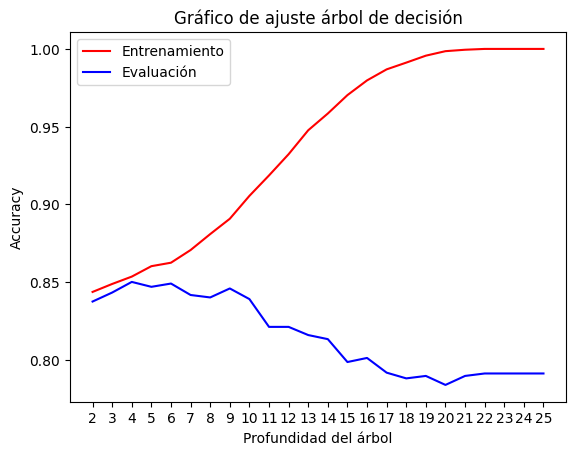

In [290]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
max_depth_list = list(range(2, 26))
for profundidad in max_depth_list:
    modelo = DecisionTreeClassifier(max_depth = profundidad, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))
    
plt.plot(max_depth_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_depth_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad del árbol')
plt.xticks(range(2,26))
plt.show()

Nos vamos a quedar con una profundidad de 4 arboles 

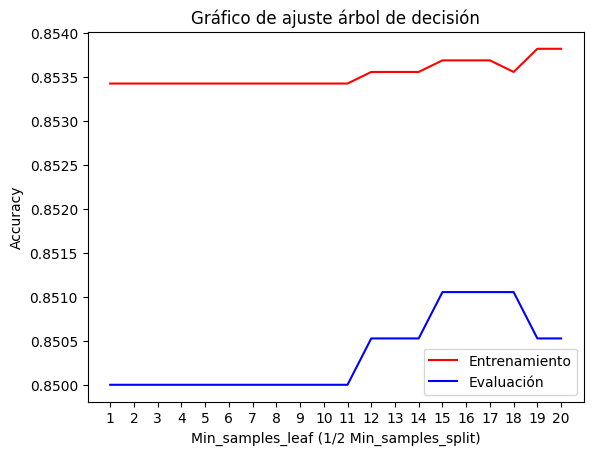

In [291]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
min_samples_list = list(range(1, 21))

for min_sample in min_samples_list:
    modelo = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = min_sample, min_samples_split = 2*min_sample, random_state = 922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(min_samples_list, train_prec, color='r', label='Entrenamiento')
plt.plot(min_samples_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_leaf (1/2 Min_samples_split)')
plt.xticks(range(1,21))
plt.show()

Nos quedamos con 15 de min_sample_leaf

In [292]:
treeModel = DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
treeModel.fit(x_train_final, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=30,
                       random_state=922)

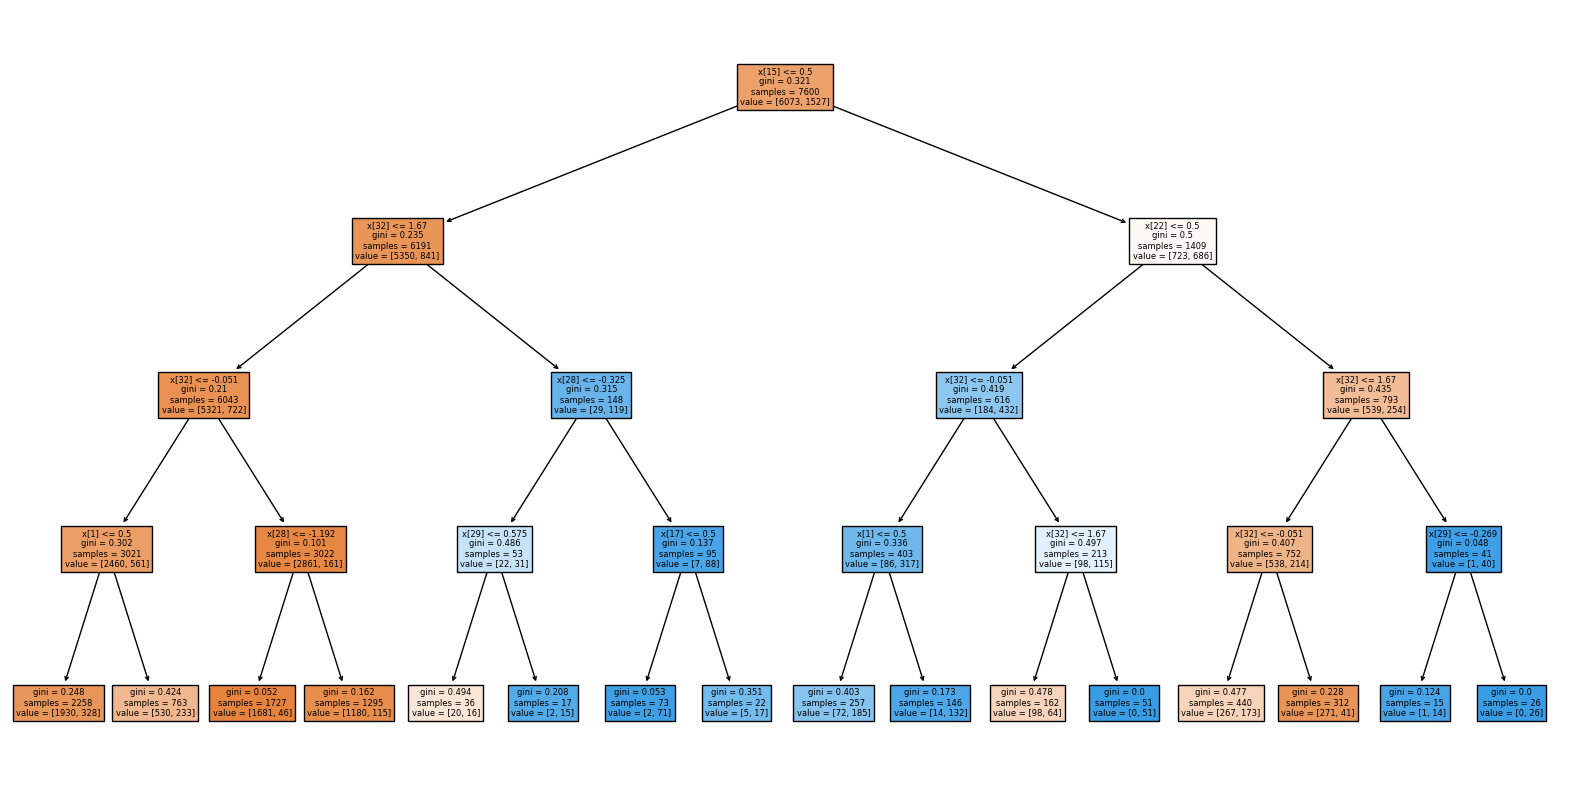

In [293]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeModel, filled=True)
plt.show()

In [42]:
treeModel.feature_importances_.tolist()

[0.0,
 0.04841886000947026,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.38511668591014897,
 0.0,
 0.0018390439236713326,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1370361167071341,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.018701384527891992,
 0.006029669106458908,
 0.0,
 0.0,
 0.40285823981522456]

#### Podemos ver como la variable de edad tiene la segunda que más importancia con un 0.38 la que mas importancia tiene es el numero de productos


In [294]:
y_predict = treeModel.predict(x_test_final)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8510526315789474

In [295]:
y_predict_proba = treeModel.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8238555221223656

In [296]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1472,26
Se va del Banco,257,145


In [297]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6393034825870647

In [298]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.017356475300400534

In [299]:
precisiones["Arbol"]=[accuracy,AUC,tfn,tfp]

#### ArbolBalanced classWeight balanced 

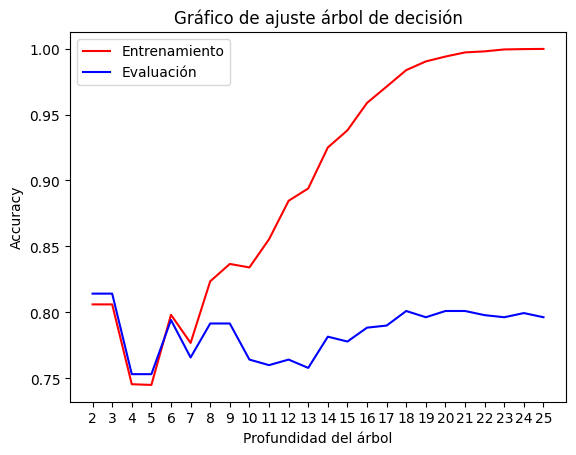

In [300]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
max_depth_list = list(range(2, 26))
for profundidad in max_depth_list:
    modelo = DecisionTreeClassifier(max_depth = profundidad, random_state=922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))
    
plt.plot(max_depth_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_depth_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad del árbol')
plt.xticks(range(2,26))
plt.show()

Nos vamos a quedar con una profundidad de 3 arboles 

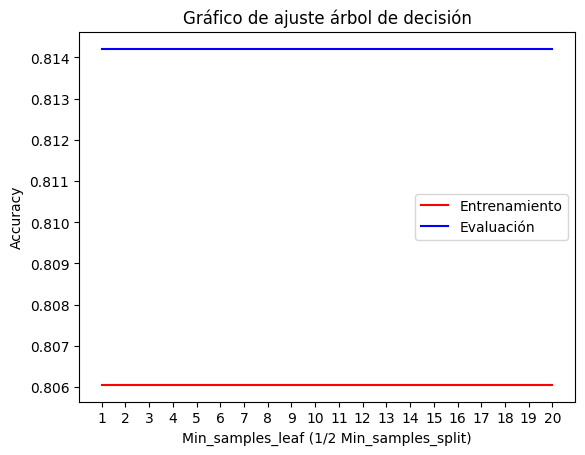

In [301]:
from sklearn.tree import DecisionTreeClassifier

train_prec =  []
test_prec = []
min_samples_list = list(range(1, 21))

for min_sample in min_samples_list:
    modelo = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = min_sample, min_samples_split = 2*min_sample, random_state = 922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(min_samples_list, train_prec, color='r', label='Entrenamiento')
plt.plot(min_samples_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste árbol de decisión')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Min_samples_leaf (1/2 Min_samples_split)')
plt.xticks(range(1,21))
plt.show()

Nos quedamos con 10 de min_sample_leaf

In [302]:
treeModelBalanced = DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
treeModelBalanced.fit(x_train_final, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=922)

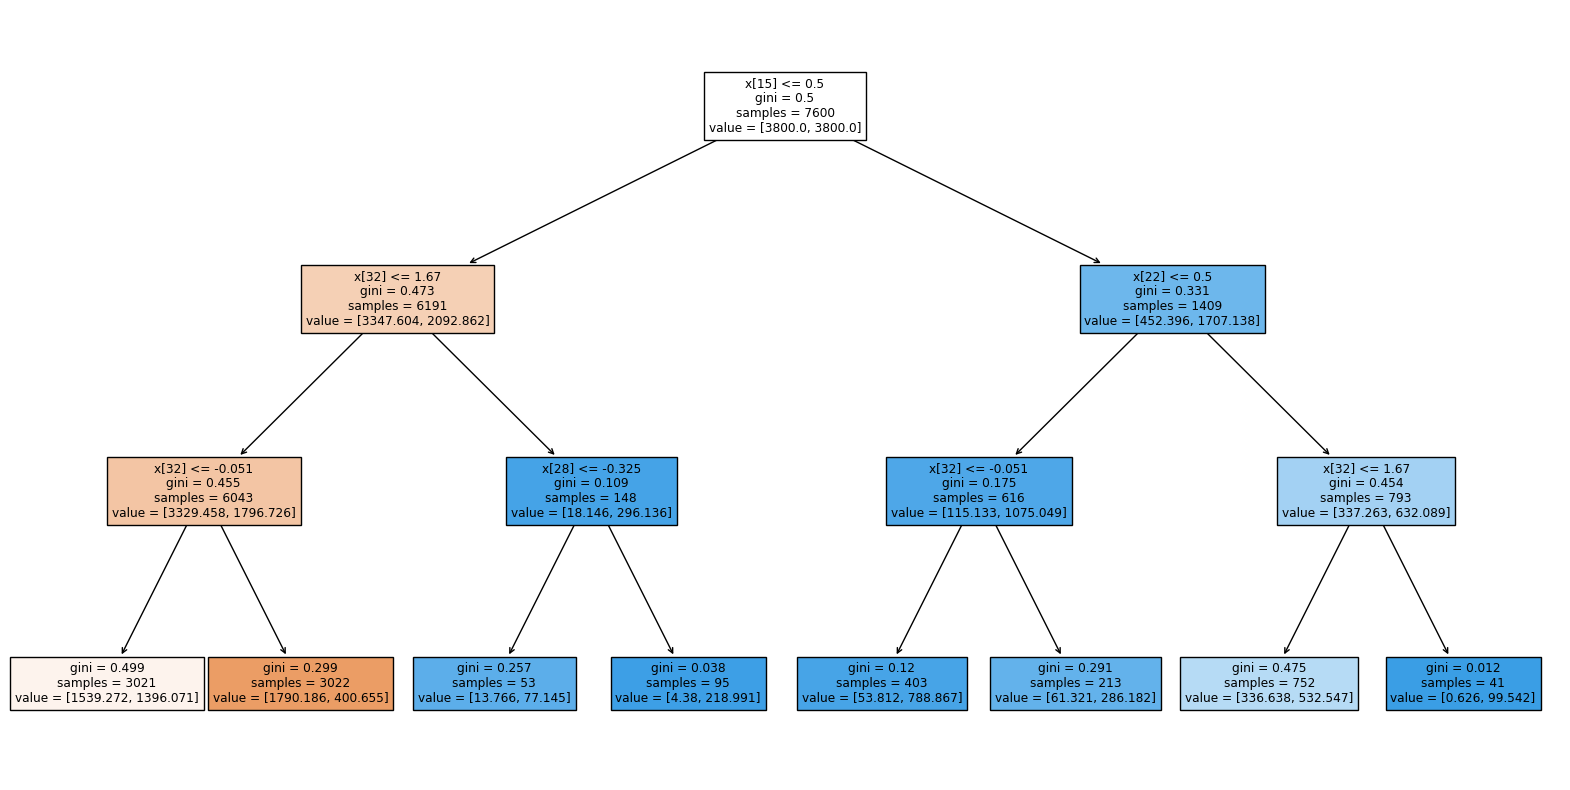

In [303]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(treeModelBalanced, filled=True)
plt.show()

In [304]:
treeModelBalanced.feature_importances_.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4926594723060602,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06522646002966521,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0021723005091481796,
 0.0,
 0.0,
 0.0,
 0.4399417671551265]

### Vemos como la edad si que es la variable más importante en el arbol balanceado seguida del numero de productos

In [305]:
y_predict = treeModelBalanced.predict(x_test_final)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8142105263157895

In [306]:
y_predict_proba = treeModelBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.79885618635793

In [307]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1334,164
Se va del Banco,189,213


In [308]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4701492537313433

In [309]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.10947930574098798

In [310]:
precisiones["ArbolBalanceado"]=[accuracy,AUC,tfn,tfp]

In [311]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798]}

# Random Forest 

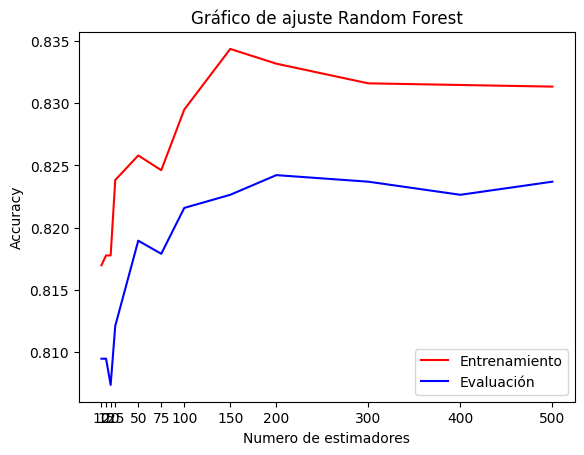

In [312]:
from sklearn.ensemble import RandomForestClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = RandomForestClassifier(n_estimators = num_estimadores, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Random Forest')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

El numero de estimadores que me voy a quedar es el de 200 

In [313]:
randomForest = RandomForestClassifier(n_estimators = 200, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
randomForest.fit(x_train_final,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=30,
                       n_estimators=200, random_state=922)

In [314]:
y_predict = randomForest.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8242105263157895

In [315]:
y_predict_proba = randomForest.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8285807278693316

In [316]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1491,7
Se va del Banco,327,75


In [317]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.8134328358208955

In [318]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.004672897196261682

In [319]:
precisiones['RandomForest'] = [accuracy,AUC,tfn,tfp]


In [320]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8242105263157895,
  0.8285807278693316,
  0.8134328358208955,
  0.004672897196261682]}

# Random Forest Balanced con el class Weight

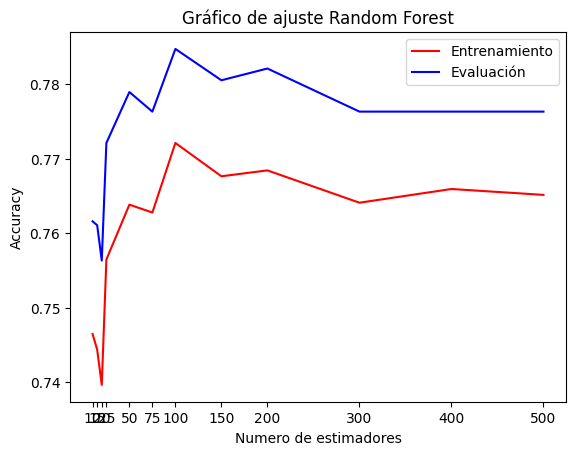

In [326]:
from sklearn.ensemble import RandomForestClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = RandomForestClassifier(n_estimators = num_estimadores, max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Random Forest')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

El numero de estimadores que me voy a quedar es el de 50 

In [327]:
randomForestBalanced = RandomForestClassifier(n_estimators = 150, max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced")
randomForestBalanced.fit(x_train_final,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=150, random_state=922)

In [328]:
y_predict = randomForestBalanced.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.7805263157894737

In [329]:
y_predict_proba = randomForestBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8251765206012662

In [330]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1202,296
Se va del Banco,121,281


In [331]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3009950248756219

In [332]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.19759679572763686

In [333]:
precisiones['RandomForestBalanced'] = [accuracy,AUC,tfn,tfp]


In [334]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8242105263157895,
  0.8285807278693316,
  0.8134328358208955,
  0.004672897196261682],
 'RandomForestBalanced': [0.7805263157894737,
  0.8251765206012662,
  0.3009950248756219,
  0.19759679572763686]}

# Bagging 

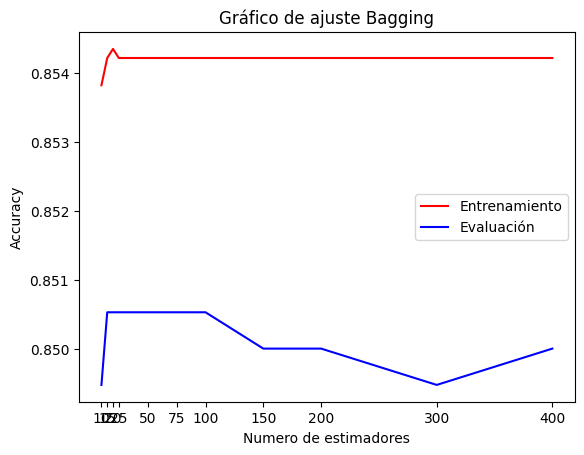

In [335]:
from sklearn.ensemble import BaggingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400]

for num_estimadores in n_estimadores_list:
    modelo = BaggingClassifier(DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922),n_estimators =num_estimadores,random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Bagging')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

Vamos a quedarnos con 20 estimadores

In [336]:
BAG_model = BaggingClassifier(DecisionTreeClassifier(max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922),n_estimators =20,random_state=922)
BAG_model.fit(x_train_final, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=15,
                                                   min_samples_split=30,
                                                   random_state=922),
                  n_estimators=20, random_state=922)

In [337]:
y_predict = BAG_model.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8505263157894737

In [338]:
y_predict_proba = BAG_model.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8436198513440807

In [339]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1468,30
Se va del Banco,254,148


In [340]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6318407960199005

In [341]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.020026702269692925

In [342]:
precisiones['Bagging'] = [accuracy,AUC,tfn,tfp]

In [343]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8242105263157895,
  0.8285807278693316,
  0.8134328358208955,
  0.004672897196261682],
 'RandomForestBalanced': [0.7805263157894737,
  0.8251765206012662,
  0.3009950248756219,
  0.19759679572763686],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925]}

# Bagging Balanced con el class Weight

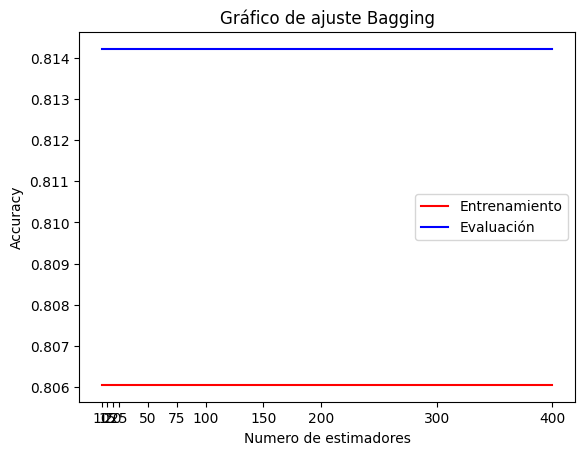

In [344]:
from sklearn.ensemble import BaggingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400]

for num_estimadores in n_estimadores_list:
    modelo = BaggingClassifier(DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced"),n_estimators =num_estimadores,random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste Bagging')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

Vamos a quedarnos con 200 estimadores

In [345]:
BAG_modelBalanced = BaggingClassifier(DecisionTreeClassifier(max_depth=3,  min_samples_leaf = 10, min_samples_split = 10*2, random_state=922,class_weight="balanced"),n_estimators =200,random_state=922)
BAG_modelBalanced.fit(x_train_final, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=3,
                                                   min_samples_leaf=10,
                                                   min_samples_split=20,
                                                   random_state=922),
                  n_estimators=200, random_state=922)

In [346]:
y_predict = BAG_modelBalanced.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8142105263157895

In [347]:
y_predict_proba = BAG_modelBalanced.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.8265871908813741

In [348]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1334,164
Se va del Banco,189,213


In [349]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4701492537313433

In [350]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.10947930574098798

In [351]:
precisiones['BaggingBalanced'] = [accuracy,AUC,tfn,tfp]

In [352]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7864565689576151,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.7876123388398462,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8242105263157895,
  0.8285807278693316,
  0.8134328358208955,
  0.004672897196261682],
 'RandomForestBalanced': [0.7805263157894737,
  0.8251765206012662,
  0.3009950248756219,
  0.19759679572763686],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798]}

# Gradient Boosting

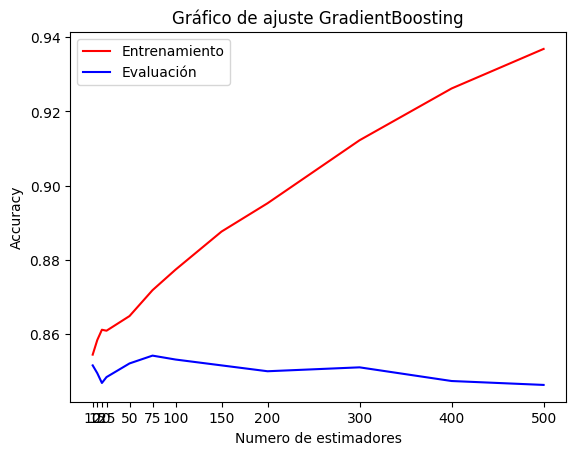

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

train_prec =  []
test_prec = []
n_estimadores_list = [10,15, 20, 25,50,75,100,150,200,300,400,500]

for num_estimadores in n_estimadores_list:
    modelo = GradientBoostingClassifier(n_estimators = num_estimadores, max_depth=4,  min_samples_leaf =15, min_samples_split = 15*2, random_state=922)
    modelo.fit(x_train_final, y_train)
    train_prec.append(accuracy_score(y_train, modelo.predict(x_train_final)))
    test_prec.append(accuracy_score(y_test, modelo.predict(x_test_final)))

plt.plot(n_estimadores_list, train_prec, color='r', label='Entrenamiento')
plt.plot(n_estimadores_list, test_prec, color='b', label='Evaluación')
plt.title('Gráfico de ajuste GradientBoosting')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Numero de estimadores')
plt.xticks(n_estimadores_list)
plt.show()

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier(n_estimators = 75, max_depth=4,  min_samples_leaf = 15, min_samples_split = 15*2, random_state=922)
GB_model.fit(x_train_final,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=15,
                           min_samples_split=30, n_estimators=75,
                           random_state=922)

In [99]:
y_predict = GB_model.predict(x_test_final)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8542105263157894

In [100]:
y_predict_proba = GB_model.predict_proba(x_test_final) #Nos guardamos las probabilidades de pertenencia a cada clase
y_predict_proba = y_predict_proba[:, 1] #Nos guardamos la probabilidad de pertenencia solo a la clase positiva
AUC = roc_auc_score(y_test, y_predict_proba)
AUC

0.857815395651914

In [101]:
matriz_Confusion = confusion_matrix(y_test,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1438,60
Se va del Banco,217,185


In [102]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.5398009950248757

In [103]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.04005340453938585

In [104]:
precisiones['GradientBoosting'] = [accuracy,AUC,tfn,tfp]

In [105]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585]}

# Elección del mejor modelo

In [106]:
df_precisiones = pd.DataFrame.from_dict(precisiones,orient ='index',columns=['Accuracy','AUC','Falsos negativos','Falsos positivos'])


In [107]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos
RegresionLogistica,0.823158,0.786372,0.684080,0.040721
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669
Arbol,0.851053,0.823856,0.639303,0.017356
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479
RandomForest,0.824737,0.831533,0.818408,0.002670
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557
Bagging,0.850526,0.843620,0.631841,0.020027
BaggingBalanced,0.814211,0.826587,0.470149,0.109479
GradientBoosting,0.854211,0.857815,0.539801,0.040053


puntuacion = 0.3*Accuracy + 0.2*AUC + 0.35(1-Taso Falsos Negativos)+0.15(1-Taso Falsos Positivos)

In [108]:
df_precisiones['puntuacion'] = 0.2*df_precisiones.Accuracy+0.3*df_precisiones.AUC + 0.35*(1-df_precisiones['Falsos negativos'])+0.15*(1-df_precisiones['Falsos positivos']) 


In [109]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248


### El mejor modelo segun la puntuacion es el RandomForestBalanced

# Vamos a empezar con las Redes Neuronales

In [110]:
init = tf.keras.initializers.glorot_uniform(seed=922)
modeloRedes = tf.keras.models.Sequential()

modeloRedes.add(tf.keras.layers.Dense(240,activation="relu",input_shape = (x_train_final.shape[1],),kernel_initializer=init))
modeloRedes.add(tf.keras.layers.Dense(570, activation="relu",kernel_initializer=init))
modeloRedes.add(tf.keras.layers.Dense(570, activation="relu",kernel_initializer=init))
modeloRedes.add(tf.keras.layers.Dense(240, activation="relu",kernel_initializer=init))


modeloRedes.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_initializer=init))

modeloRedes.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

In [111]:
df["Exited"].value_counts()

0    7571
1    1929
Name: Exited, dtype: int64

In [112]:
peso_0 = df["Exited"].value_counts().values.sum()/df["Exited"].value_counts()[0]
peso_1=df["Exited"].value_counts().values.sum()/df["Exited"].value_counts()[1]

In [113]:
print(peso_0)
peso_1

1.2547880068683133


4.924831518921721

In [114]:
modeloRedes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               8400      
                                                                 
 dense_1 (Dense)             (None, 570)               137370    
                                                                 
 dense_2 (Dense)             (None, 570)               325470    
                                                                 
 dense_3 (Dense)             (None, 240)               137040    
                                                                 
 dense_4 (Dense)             (None, 1)                 241       
                                                                 
Total params: 608,521
Trainable params: 608,521
Non-trainable params: 0
_________________________________________________________________


In [115]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('./Modelos/mejorModeloBank3.h5', save_best_only=True, monitor='val_accuracy', mode='max')
historybank = modeloRedes.fit(x_train_final, y_train, epochs=120, batch_size=64, validation_data=(x_test_final, y_test), callbacks=[callback,mcp_save], class_weight={0:peso_0,1:peso_1})

Epoch 1/120
119/119 [==============================] - 2s 10ms/step - loss: 1.0869 - accuracy: 0.7217 - val_loss: 0.5901 - val_accuracy: 0.6953
Epoch 2/120
119/119 [==============================] - 1s 9ms/step - loss: 0.9463 - accuracy: 0.7653 - val_loss: 0.4453 - val_accuracy: 0.7837
Epoch 3/120
119/119 [==============================] - 1s 9ms/step - loss: 0.8996 - accuracy: 0.7822 - val_loss: 0.4943 - val_accuracy: 0.7705
Epoch 4/120
119/119 [==============================] - 1s 9ms/step - loss: 0.8665 - accuracy: 0.7824 - val_loss: 0.4661 - val_accuracy: 0.7816
Epoch 5/120
119/119 [==============================] - 1s 9ms/step - loss: 0.8253 - accuracy: 0.7959 - val_loss: 0.4641 - val_accuracy: 0.7668
Epoch 6/120
119/119 [==============================] - 1s 9ms/step - loss: 0.7723 - accuracy: 0.8062 - val_loss: 0.4455 - val_accuracy: 0.7868
Epoch 7/120
119/119 [==============================] - 1s 9ms/step - loss: 0.7208 - accuracy: 0.8151 - val_loss: 0.4986 - val_accuracy: 0.750

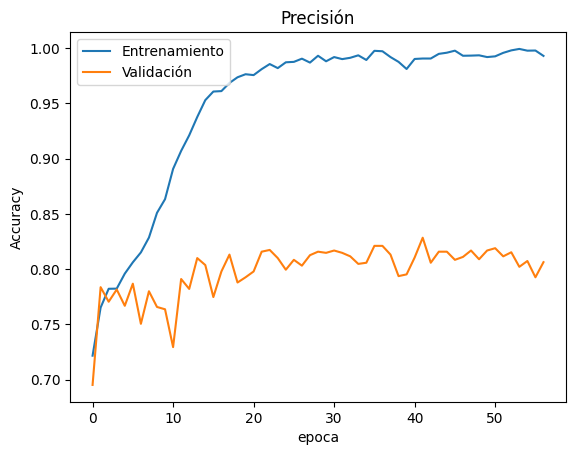

In [116]:
plt.plot(historybank.history['accuracy'])
plt.plot(historybank.history['val_accuracy'])
plt.title('Precisión')
plt.ylabel('Accuracy')
plt.xlabel('epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [117]:
modeloRedesNeuronales2 = tf.keras.models.load_model("./Modelos/mejorModeloBank3.h5")

In [118]:
modeloRedesNeuronales2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               8400      
                                                                 
 dense_1 (Dense)             (None, 570)               137370    
                                                                 
 dense_2 (Dense)             (None, 570)               325470    
                                                                 
 dense_3 (Dense)             (None, 240)               137040    
                                                                 
 dense_4 (Dense)             (None, 1)                 241       
                                                                 
Total params: 608,521
Trainable params: 608,521
Non-trainable params: 0
_________________________________________________________________


In [119]:
y_predict = modeloRedesNeuronales2.predict(x_test_final)

60/60 [==============================] - 0s 2ms/step


In [120]:
y_predict

array([[2.1944452e-06],
       [9.7841322e-01],
       [1.1316777e-03],
       ...,
       [4.7627677e-06],
       [1.2834754e-03],
       [1.0434343e-02]], dtype=float32)

In [121]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #Para el cálculo del AUC
from sklearn.metrics import confusion_matrix #Para el cálculo de los falsos negativos

In [122]:
y_predictBuena = (y_predict>0.5).astype("int32")

In [123]:
accuracy = accuracy_score(y_test,y_predictBuena)
accuracy

0.828421052631579

In [124]:
AUC=roc_auc_score(y_test,y_predictBuena)
AUC

0.7037276899879773

In [125]:
matriz_Confusion = confusion_matrix(y_test,y_predictBuena)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1378,120
Se va del Banco,206,196


In [126]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.5124378109452736

In [127]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.0801068090787717

In [128]:
precisiones['RedesNeuronales3'] = [accuracy,AUC,tfn,tfp]

In [129]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585],
 'RedesNeuronales3': [0.

In [130]:
df_precisiones = pd.DataFrame.from_dict(precisiones,orient ='index',columns=['Accuracy','AUC','Falsos negativos','Falsos positivos'])


In [131]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos
RegresionLogistica,0.823158,0.786372,0.684080,0.040721
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669
Arbol,0.851053,0.823856,0.639303,0.017356
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479
RandomForest,0.824737,0.831533,0.818408,0.002670
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557
Bagging,0.850526,0.843620,0.631841,0.020027
BaggingBalanced,0.814211,0.826587,0.470149,0.109479
GradientBoosting,0.854211,0.857815,0.539801,0.040053
RedesNeuronales3,0.828421,0.703728,0.512438,0.080107


In [132]:
df_precisiones['puntuacion'] = 0.2*df_precisiones.Accuracy+0.3*df_precisiones.AUC + 0.35*(1-df_precisiones['Falsos negativos'])+0.15*(1-df_precisiones['Falsos positivos']) 


In [133]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248
RedesNeuronales3,0.828421,0.703728,0.512438,0.080107,0.685433


### Podemos observar como el modelo que más puntiacion ha obtenido ha sido el modelo de randomForestBalanced seguido del segundo modelo de red neuronal

# Vamos a probar el modelo con los datos de ComprobarModelo

##### Para ello importamos los datos y tenemos que aplicar las misma transformaciones

In [134]:
df = pd.read_csv("./Data/datosParaComprobarModelo.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15765311,Zhirov,642,Spain,Male,34,8,0.00,1,1,0,72085.10,0,0,3,GOLD,323
1,15704466,Udokamma,692,France,Female,34,7,0.00,2,1,0,195074.62,0,0,1,DIAMOND,427
2,15573045,Earl,547,France,Male,62,10,127738.75,2,1,1,85153.00,0,0,4,GOLD,666
3,15596761,Hawdon,515,Germany,Male,60,9,113715.36,1,1,0,18424.24,1,1,1,GOLD,850
4,15588622,Marchesi,599,Germany,Male,25,7,108380.72,1,1,1,79005.95,0,0,1,SILVER,933


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          500 non-null    int64  
 1   Surname             500 non-null    object 
 2   CreditScore         500 non-null    int64  
 3   Geography           500 non-null    object 
 4   Gender              500 non-null    object 
 5   Age                 500 non-null    int64  
 6   Tenure              500 non-null    int64  
 7   Balance             500 non-null    float64
 8   NumOfProducts       500 non-null    int64  
 9   HasCrCard           500 non-null    int64  
 10  IsActiveMember      500 non-null    int64  
 11  EstimatedSalary     500 non-null    float64
 12  Exited              500 non-null    int64  
 13  Complain            500 non-null    int64  
 14  Satisfaction Score  500 non-null    int64  
 15  Card Type           500 non-null    object 
 16  Point Ea

In [136]:
bins = [300,579,669,739,799,850]
names = ["Poor","Fair","Good","Very Good","Excellent"]
df["CreditScoreCategorizada"]= pd.cut(df["CreditScore"],bins,labels=names)

In [137]:
bins = [17,25,35,45,65,df["Age"].max()]
names = ["Jovenes","Jovenes-Adultos","Adultos","Adultos-Mayores","Mayores"]
df["AgeCategorizada"]= pd.cut(df["Age"],bins,labels=names)

In [138]:
df.drop(columns=["CustomerId","Surname","CreditScore","Age"], inplace=True)


In [139]:
df

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,Spain,Male,8,0.00,1,1,0,72085.10,0,0,3,GOLD,323,Fair,Jovenes-Adultos
1,France,Female,7,0.00,2,1,0,195074.62,0,0,1,DIAMOND,427,Good,Jovenes-Adultos
2,France,Male,10,127738.75,2,1,1,85153.00,0,0,4,GOLD,666,Poor,Adultos-Mayores
3,Germany,Male,9,113715.36,1,1,0,18424.24,1,1,1,GOLD,850,Poor,Adultos-Mayores
4,Germany,Male,7,108380.72,1,1,1,79005.95,0,0,1,SILVER,933,Fair,Jovenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,France,Male,7,126195.81,1,1,1,133172.48,0,0,1,DIAMOND,549,Good,Adultos
496,France,Male,7,82259.29,1,1,0,8996.97,0,0,1,DIAMOND,325,Poor,Adultos
497,Germany,Male,1,124737.96,1,0,1,90389.61,1,1,3,PLATINUM,914,Fair,Adultos-Mayores
498,Germany,Male,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790,Poor,Adultos


In [140]:
df.drop(columns="Complain",inplace=True)


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Geography                500 non-null    object  
 1   Gender                   500 non-null    object  
 2   Tenure                   500 non-null    int64   
 3   Balance                  500 non-null    float64 
 4   NumOfProducts            500 non-null    int64   
 5   HasCrCard                500 non-null    int64   
 6   IsActiveMember           500 non-null    int64   
 7   EstimatedSalary          500 non-null    float64 
 8   Exited                   500 non-null    int64   
 9   Satisfaction Score       500 non-null    int64   
 10  Card Type                500 non-null    object  
 11  Point Earned             500 non-null    int64   
 12  CreditScoreCategorizada  500 non-null    category
 13  AgeCategorizada          500 non-null    category
dtypes: categor

Importamos las transformaciones que hemos realizado tanto el ohe como el scaler

In [142]:
with open ("./Transformaciones/TransformacionOHE.pkl","rb") as a:
    transformacionCategoricas = pickle.load(a)

In [143]:
with open ("./Transformaciones/TransformacionSCALER.pkl","rb")as a:
    transformacionNumericas = pickle.load(a)

In [144]:
variablesx = list(df.columns)
variablesx.remove("Exited")
variablesx

['Geography',
 'Gender',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Satisfaction Score',
 'Card Type',
 'Point Earned',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [145]:
x = df[variablesx]
y = df["Exited"]
y


0      0
1      0
2      0
3      1
4      0
      ..
495    0
496    0
497    1
498    1
499    1
Name: Exited, Length: 500, dtype: int64

In [146]:
columns_to_encode = ['Geography','Gender','Card Type','CreditScoreCategorizada','AgeCategorizada','HasCrCard','IsActiveMember','Satisfaction Score']
encoded_columns_train = transformacionCategoricas.transform(x[columns_to_encode].values)
columns_to_escaler = ["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]
escaler_columns_train = transformacionNumericas.transform(x[columns_to_escaler].values)
x_final = np.concatenate([encoded_columns_train,escaler_columns_train],axis=1)



In [147]:
x_final

array([[ 0.        ,  0.        ,  1.        , ..., -1.25773175,
         1.02605363, -0.9113261 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.79473577,
         0.68019797,  0.80986634],
       [ 1.        ,  0.        ,  0.        , ...,  0.26926462,
         1.71776494,  0.80986634],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.37333196,
        -1.39493599, -0.9113261 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.82129829,
        -0.70322467, -0.9113261 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.3289619 ,
        -0.70322467, -0.9113261 ]])

In [148]:
accuracy_Test = []
tfn_Test = []

Modelo de regresion logisticas

In [149]:
y_predict=logreg.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.816

In [150]:
accuracy_Test.append(logreg_accuracy)

In [151]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,371,20
Se va del Banco,72,37


In [152]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6605504587155964

In [153]:
tfn_Test.append(tfn)

Ahora vamos a aplicar el modelo de regresion logistica Balanceado

In [154]:
y_predict = logregBalanced.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.714

In [155]:
accuracy_Test.append(logreg_accuracy)

In [156]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,283,108
Se va del Banco,35,74


In [157]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3211009174311927

In [158]:
tfn_Test.append(tfn)

In [159]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714]


[0.6605504587155964, 0.3211009174311927]

# Arbol de decision

In [160]:
y_predict = treeModel.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.834

In [161]:
accuracy_Test.append(logreg_accuracy)

In [162]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,380,11
Se va del Banco,72,37


In [163]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6605504587155964

In [164]:
tfn_Test.append(tfn)

In [165]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834]


[0.6605504587155964, 0.3211009174311927, 0.6605504587155964]

## Vamos a hacer el arbol de decision Balanceado

In [166]:
y_predict = treeModelBalanced.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.804

In [167]:
accuracy_Test.append(logreg_accuracy)

In [168]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,337,54
Se va del Banco,44,65


In [169]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4036697247706422

In [170]:
tfn_Test.append(tfn)

In [171]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422]

# Random Forest

In [172]:
y_predict = randomForest.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.808

In [173]:
accuracy_Test.append(logreg_accuracy)

In [174]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,388,3
Se va del Banco,93,16


In [175]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.8532110091743119

In [176]:
tfn_Test.append(tfn)

In [177]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119]

## Random Forest Balanced

In [178]:
y_predict = randomForestBalanced.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.778

In [179]:
accuracy_Test.append(logreg_accuracy)

In [180]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,316,75
Se va del Banco,36,73


In [181]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3302752293577982

In [182]:
tfn_Test.append(tfn)

In [183]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808, 0.778]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119,
 0.3302752293577982]

# Bagging

In [184]:
y_predict = BAG_model.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.838

In [185]:
accuracy_Test.append(logreg_accuracy)

In [186]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,378,13
Se va del Banco,68,41


In [187]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.6238532110091743

In [188]:
tfn_Test.append(tfn)

In [189]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808, 0.778, 0.838]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119,
 0.3302752293577982,
 0.6238532110091743]

## Bagging Balanced 

In [190]:
y_predict = BAG_modelBalanced.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.804

In [191]:
accuracy_Test.append(logreg_accuracy)

In [192]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,337,54
Se va del Banco,44,65


In [193]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.4036697247706422

In [194]:
tfn_Test.append(tfn)

In [195]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808, 0.778, 0.838, 0.804]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119,
 0.3302752293577982,
 0.6238532110091743,
 0.4036697247706422]

# Gradient Boosting

In [196]:
y_predict = GB_model.predict(x_final)
logreg_accuracy = accuracy_score(y,y_predict)
logreg_accuracy

0.848

In [197]:
accuracy_Test.append(logreg_accuracy)

In [198]:
matriz_Confusion = confusion_matrix(y,y_predict)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,371,20
Se va del Banco,56,53


In [199]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.5137614678899083

In [200]:
tfn_Test.append(tfn)

In [201]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808, 0.778, 0.838, 0.804, 0.848]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119,
 0.3302752293577982,
 0.6238532110091743,
 0.4036697247706422,
 0.5137614678899083]

In [202]:
modeloRedesNeuronales = tf.keras.models.load_model("./Modelos/mejorModeloBank2.h5")


In [203]:
y_predict = modeloRedesNeuronales.predict(x_final)

16/16 [==============================] - 0s 5ms/step


In [204]:
y_predictBuena = (y_predict>0.5).astype("int32")

In [205]:
accuracy = accuracy_score(y,y_predictBuena)
accuracy

0.806

In [206]:
accuracy_Test.append(accuracy)

In [207]:
matriz_Confusion = confusion_matrix(y,y_predictBuena)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,330,61
Se va del Banco,36,73


In [208]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.3302752293577982

In [209]:
tfn_Test.append(tfn)

In [210]:
print(accuracy_Test)
tfn_Test

[0.816, 0.714, 0.834, 0.804, 0.808, 0.778, 0.838, 0.804, 0.848, 0.806]


[0.6605504587155964,
 0.3211009174311927,
 0.6605504587155964,
 0.4036697247706422,
 0.8532110091743119,
 0.3302752293577982,
 0.6238532110091743,
 0.4036697247706422,
 0.5137614678899083,
 0.3302752293577982]

In [211]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248
RedesNeuronales3,0.828421,0.703728,0.512438,0.080107,0.685433


In [226]:
modeloRedesNeuronales2 = tf.keras.models.load_model("./Modelos/mejorModeloBank.h5")


In [227]:
modeloRedesNeuronales2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               17920     
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,068,545
Trainable params: 1,068,545
Non-trainable params: 0
_________________________________________________________________


In [228]:
y_predict = modeloRedesNeuronales2.predict(x_test_final)

60/60 [==============================] - 0s 3ms/step


In [229]:
y_predict

array([[1.1975700e-14],
       [2.7978268e-07],
       [3.3191232e-06],
       ...,
       [2.8744852e-08],
       [3.4796671e-05],
       [2.1636909e-01]], dtype=float32)

In [230]:
from sklearn.metrics import accuracy_score #Para el cálculo de la accuracy
from sklearn.metrics import roc_auc_score #Para el cálculo del AUC
from sklearn.metrics import confusion_matrix #Para el cálculo de los falsos negativos

In [231]:
y_predictBuena = (y_predict>0.5).astype("int32")

In [232]:
accuracy = accuracy_score(y_test,y_predictBuena)
accuracy

0.8326315789473684

In [233]:
AUC=roc_auc_score(y_test,y_predictBuena)
AUC

0.7063979169572697

In [234]:
matriz_Confusion = confusion_matrix(y_test,y_predictBuena)
matriz_Confusion = pd.DataFrame(matriz_Confusion,index=["No se va del Banco","Se va del Banco"],columns=["No se va del Banco","Se va del Banco"])
matriz_Confusion

,No se va del Banco,Se va del Banco
No se va del Banco,1386,112
Se va del Banco,206,196


In [235]:
tfn = matriz_Confusion.iloc[1,0]/(matriz_Confusion.iloc[1,0]+matriz_Confusion.iloc[1,1])
tfn

0.5124378109452736

In [236]:
tfp = matriz_Confusion.iloc[0,1]/(matriz_Confusion.iloc[0,1]+matriz_Confusion.iloc[0,0])
tfp

0.07476635514018691

In [237]:
precisiones['RedesNeuronales1'] = [accuracy,AUC,tfn,tfp]

In [240]:
precisiones

{'RegresionLogistica': [0.8231578947368421,
  0.7863718789231412,
  0.6840796019900498,
  0.04072096128170895],
 'RegresionLogisticaBalanced': [0.7373684210526316,
  0.787590751184,
  0.3034825870646766,
  0.25166889185580776],
 'Arbol': [0.8510526315789474,
  0.8238555221223656,
  0.6393034825870647,
  0.017356475300400534],
 'ArbolBalanceado': [0.8142105263157895,
  0.79885618635793,
  0.4701492537313433,
  0.10947930574098798],
 'RandomForest': [0.8247368421052632,
  0.8315332549535368,
  0.818407960199005,
  0.0026702269692923898],
 'RandomForestBalanced': [0.8052631578947368,
  0.8301699114573994,
  0.2960199004975124,
  0.16755674232309747],
 'Bagging': [0.8505263157894737,
  0.8436198513440807,
  0.6318407960199005,
  0.020026702269692925],
 'BaggingBalanced': [0.8142105263157895,
  0.8265871908813741,
  0.4701492537313433,
  0.10947930574098798],
 'GradientBoosting': [0.8542105263157894,
  0.857815395651914,
  0.5398009950248757,
  0.04005340453938585],
 'RedesNeuronales3': [0.

In [241]:
df_precisiones = pd.DataFrame.from_dict(precisiones,orient ='index',columns=['Accuracy','AUC','Falsos negativos','Falsos positivos'])


In [245]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos
RegresionLogistica,0.823158,0.786372,0.684080,0.040721
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669
Arbol,0.851053,0.823856,0.639303,0.017356
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479
RandomForest,0.824737,0.831533,0.818408,0.002670
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557
Bagging,0.850526,0.843620,0.631841,0.020027
BaggingBalanced,0.814211,0.826587,0.470149,0.109479
GradientBoosting,0.854211,0.857815,0.539801,0.040053
RedesNeuronales3,0.828421,0.703728,0.512438,0.080107


In [246]:
df_precisiones['puntuacion'] = 0.2*df_precisiones.Accuracy+0.3*df_precisiones.AUC + 0.35*(1-df_precisiones['Falsos negativos'])+0.15*(1-df_precisiones['Falsos positivos']) 


In [247]:
df_precisiones

,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248
RedesNeuronales3,0.828421,0.703728,0.512438,0.080107,0.685433


In [248]:
df_precisiones.to_excel("./Data/MatrizPrecisionesModelos.xlsx")

In [250]:
df_precisiones_final = df_precisiones[:9]

In [251]:
df_precisiones_final.loc["RedesNeuronales2"]=df_precisiones.loc["RedesNeuronales2"]
df_precisiones_final

C:\Users\antonioiglesias99@gm\AppData\Local\Temp\ipykernel_23004\1176705454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precisiones_final.loc["RedesNeuronales2"]=df_precisiones.loc["RedesNeuronales2"]


,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248
RedesNeuronales2,0.831053,0.765457,0.348259,0.120828,0.755833


# Vamos a sacar las precisiones tanto del modelo como el accuracy y la tasa de fasos negativos de los datos con los que no ha sido entrenado el modelo

In [252]:
df_precisiones_final["Accuracy_Test"]=accuracy_Test
df_precisiones_final["TFN_Test"]=tfn_Test
df_precisiones_final


C:\Users\antonioiglesias99@gm\AppData\Local\Temp\ipykernel_23004\4260452209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precisiones_final["Accuracy_Test"]=accuracy_Test
C:\Users\antonioiglesias99@gm\AppData\Local\Temp\ipykernel_23004\4260452209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precisiones_final["TFN_Test"]=tfn_Test


,Accuracy,AUC,Falsos negativos,Falsos positivos,puntuacion,Accuracy_Test,TFN_Test
RegresionLogistica,0.823158,0.786372,0.684080,0.040721,0.655007,0.816,0.660550
RegresionLogisticaBalanced,0.737368,0.787591,0.303483,0.251669,0.739782,0.714,0.321101
Arbol,0.851053,0.823856,0.639303,0.017356,0.691007,0.834,0.660550
ArbolBalanceado,0.814211,0.798856,0.470149,0.109479,0.721525,0.804,0.403670
RandomForest,0.824737,0.831533,0.818408,0.002670,0.627564,0.808,0.853211
RandomForestBalanced,0.805263,0.830170,0.296020,0.167557,0.781363,0.778,0.330275
Bagging,0.850526,0.843620,0.631841,0.020027,0.699043,0.838,0.623853
BaggingBalanced,0.814211,0.826587,0.470149,0.109479,0.729844,0.804,0.403670
GradientBoosting,0.854211,0.857815,0.539801,0.040053,0.733248,0.848,0.513761
RedesNeuronales2,0.831053,0.765457,0.348259,0.120828,0.755833,0.806,0.330275


In [253]:
df_precisiones_final.to_excel("./Data/MatrizPrecisionesModelosTest.xlsx")

# El mejor modelo y con el que nos quedamos es las RedesNeuronales2